In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [ ]:
df = pd.read_csv('/content/sample_data/soilmoisture_dataset.csv')

In [ ]:
df.head()

,index,datetime,soil_moisture,soil_temperature,454,458,462,466,470,474,...,914,918,922,926,930,934,938,942,946,950
0,0,2017-05-23 14:06:17,0.471176,0.405797,0.082131,0.055863,0.050047,0.047925,0.047498,0.046464,...,0.152845,0.152615,0.152927,0.154240,0.155018,0.154725,0.154682,0.154275,0.153477,0.153929
1,1,2017-05-23 14:08:17,0.470000,0.425121,0.079510,0.055326,0.049116,0.047579,0.046745,0.046833,...,0.152715,0.153102,0.153551,0.153590,0.153688,0.153370,0.154021,0.155543,0.156220,0.156727
2,2,2017-05-23 14:10:17,0.468235,0.434783,0.080599,0.054065,0.049150,0.047537,0.046525,0.046032,...,0.152362,0.152158,0.153204,0.153942,0.154610,0.154629,0.155609,0.155545,0.154884,0.154485
3,3,2017-05-23 14:12:17,0.460588,0.415459,0.078024,0.054972,0.049052,0.047920,0.046883,0.046775,...,0.153281,0.153990,0.154499,0.155012,0.154691,0.154643,0.155405,0.155918,0.157645,0.157824
4,4,2017-05-23 14:14:17,0.460000,0.429952,0.079973,0.055335,0.049314,0.047373,0.047028,0.046963,...,0.152803,0.153085,0.153295,0.154230,0.155071,0.155624,0.156504,0.156859,0.156634,0.156176


In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['soil_temperature']])
df['soil_temperature'] = scaler.transform(df[['soil_temperature']])

scaler.fit(df[['soil_moisture']])
df['soil_moisture'] = scaler.transform(df[['soil_moisture']])

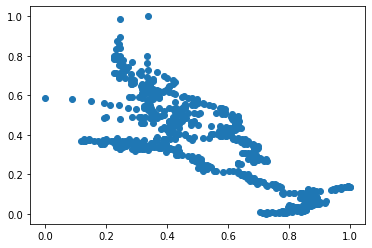

In [ ]:
plt.scatter(df['soil_temperature'],df['soil_moisture'])

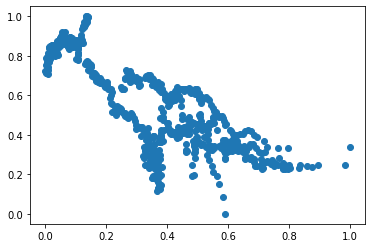

In [ ]:
plt.scatter(df['soil_moisture'],df['soil_temperature'])

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['soil_temperature','soil_moisture']])
    sse.append(km.inertia_)

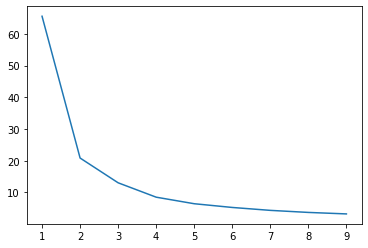

In [ ]:
plt.plot(k_rng,sse)

In [ ]:
km = KMeans(n_clusters=5)
yp = km.fit_predict(df[['soil_temperature','soil_moisture']])
yp


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2,

In [ ]:
df['cluster']=yp
df.head()

,index,datetime,soil_moisture,soil_temperature,454,458,462,466,470,474,...,918,922,926,930,934,938,942,946,950,cluster
0,0,2017-05-23 14:06:17,0.471176,0.405797,0.082131,0.055863,0.050047,0.047925,0.047498,0.046464,...,0.152615,0.152927,0.154240,0.155018,0.154725,0.154682,0.154275,0.153477,0.153929,3
1,1,2017-05-23 14:08:17,0.470000,0.425121,0.079510,0.055326,0.049116,0.047579,0.046745,0.046833,...,0.153102,0.153551,0.153590,0.153688,0.153370,0.154021,0.155543,0.156220,0.156727,3
2,2,2017-05-23 14:10:17,0.468235,0.434783,0.080599,0.054065,0.049150,0.047537,0.046525,0.046032,...,0.152158,0.153204,0.153942,0.154610,0.154629,0.155609,0.155545,0.154884,0.154485,3
3,3,2017-05-23 14:12:17,0.460588,0.415459,0.078024,0.054972,0.049052,0.047920,0.046883,0.046775,...,0.153990,0.154499,0.155012,0.154691,0.154643,0.155405,0.155918,0.157645,0.157824,3
4,4,2017-05-23 14:14:17,0.460000,0.429952,0.079973,0.055335,0.049314,0.047373,0.047028,0.046963,...,0.153085,0.153295,0.154230,0.155071,0.155624,0.156504,0.156859,0.156634,0.156176,3


In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]




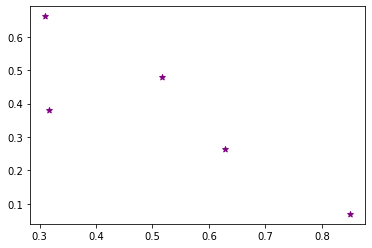

In [ ]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

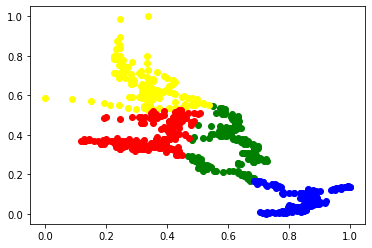

In [ ]:
plt.scatter(df1.soil_temperature,df1.soil_moisture,color='green')
plt.scatter(df2.soil_temperature,df2.soil_moisture,color='blue')
plt.scatter(df3.soil_temperature,df3.soil_moisture,color='yellow')
plt.scatter(df4.soil_temperature,df4.soil_moisture,color='red')
plt.scatter(df5.soil_temperature,df5.soil_moisture,color='black')